# Exploratory data analysis of a coursera dataset

I will begin the analysis by importing all of the required modules for the analysis and representation of data.

In [50]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import functions as fn
import plotly.io as pio
pio.renderers.default = "plotly_mimetype"
from IPython.display import Image, display

I will continue by reading and displaying the data:

In [51]:
df_coursera = pd.read_csv("coursea_data.csv", index_col=0).sort_index()

df_coursera

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,480k
1,Introduction to Data Science,IBM,SPECIALIZATION,4.6,Beginner,310k
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2.5m
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1.5m
4,Google IT Support,Google,PROFESSIONAL CERTIFICATE,4.8,Beginner,350k
...,...,...,...,...,...,...
886,Understanding Modern Finance,American Institute of Business and Economics,SPECIALIZATION,4.4,Intermediate,11k
887,Object-Oriented Design,University of Alberta,COURSE,4.7,Intermediate,33k
888,Aprende a programar con Python,Universidad Austral,SPECIALIZATION,4.2,Beginner,6.6k
889,Погружение в Python,Moscow Institute of Physics and Technology,COURSE,4.7,Intermediate,45k


### Data pre-processing

The raw data needs to be checked for null values, duplicates and outliers. The data types need to be analyzed and reformed. General descriptive analysis needs to be presented.

Checking for missing values:

In [52]:
(
    print("There are no missing data")
    if any(df_coursera.isna().sum()) == 0
    else print("There are missing data")
)

There are no missing data


Checking for duplicates:

In [53]:
(
    print("There are no duplicates")
    if df_coursera.duplicated().sum() == 0
    else print("There are duplicates")
)

There are no duplicates


Checking the data type of the columns and making corrections where needed:

In [54]:
df_coursera.dtypes

course_title                 object
course_organization          object
course_Certificate_type      object
course_rating               float64
course_difficulty            object
course_students_enrolled     object
dtype: object

As we can see the column course_students_enrolled is of object type, but the data present in this column is in fact needed in a numeric format for us to make sense of the data frame. Here k stands for $10^3$ and m stands for $10^6$.

In [55]:
df_coursera["course_students_enrolled"] = (
    df_coursera["course_students_enrolled"]
    .str.replace("k", "e+3")
    .str.replace("m", "e+6")
    .map(pd.eval)
    .astype(int)
)
df_coursera.course_students_enrolled

0       480000
1       310000
2      2500000
3      1500000
4       350000
        ...   
886      11000
887      33000
888       6600
889      45000
890       6400
Name: course_students_enrolled, Length: 891, dtype: int64

In [56]:
df_coursera.dtypes

course_title                 object
course_organization          object
course_Certificate_type      object
course_rating               float64
course_difficulty            object
course_students_enrolled      int64
dtype: object

Checking for outliers using the find_outliers_iqr from the functions module:

In [57]:
outliers = fn.find_outliers_iqr(df_coursera)
outliers.sum()

course_rating               17
course_students_enrolled    78
dtype: int64

As we can see there are 17 oulier rows in the `course_rating` column and 78 in the `course_students_enrolled` out of the 891 total rows. A visual representation of this data would be handy in this case.

In [58]:
outlier_data = df_coursera[outliers].dropna(how="all", axis=1).dropna(how="all", axis=0)
outlier_data

,course_rating,course_students_enrolled
0,NaN,480000.0
1,NaN,310000.0
2,NaN,2500000.0
3,NaN,1500000.0
4,NaN,350000.0
...,...,...
803,4.2,NaN
821,4.2,NaN
831,NaN,240000.0
873,4.0,NaN


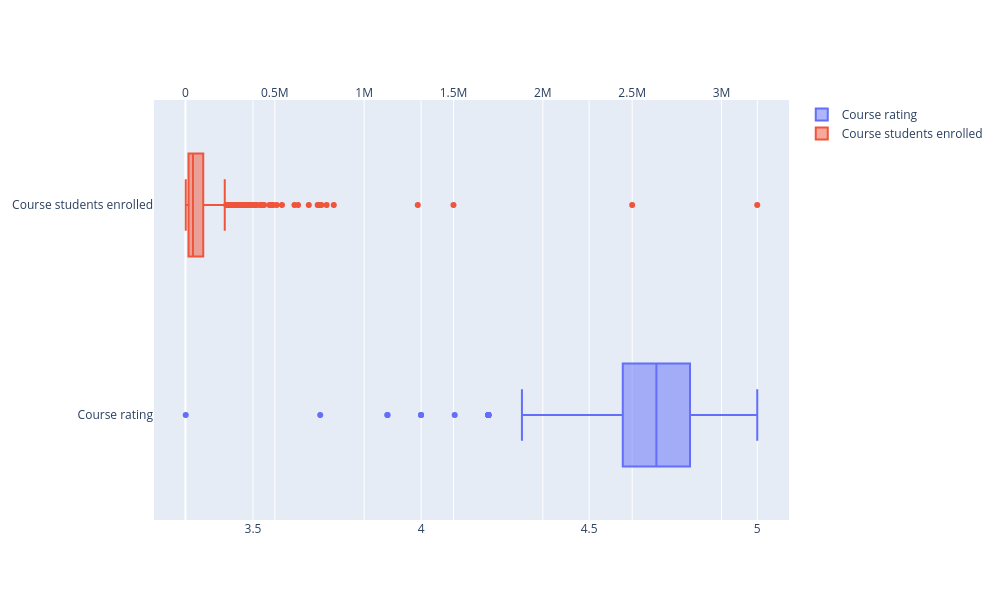

In [59]:
fig = go.Figure()

fig.add_trace(go.Box(x=df_coursera["course_rating"], name="Course rating"))
fig.add_trace(
    go.Box(
        x=df_coursera["course_students_enrolled"],
        xaxis="x2",
        name="Course students enrolled",
    )
)
fig.update_layout(xaxis2=dict(overlaying="x", side="top"))
display(Image(pio.to_image(fig, format="png", width=1000, height=600)))
# fig.show()

**Note on outliers**:As we can see is a considerable amount of outliers, especially when considering the `course_students_enrolled` column. However, given the size of the dataset, I believe these points represent genuine data that need to be taken into account when analyzing the dataset.

The following cell shows the summary statistics of the dataframe columns:

In [60]:
description = df_coursera.describe(include="all")
description

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
count,891,891,891,891.000000,891,8.910000e+02
unique,888,154,3,NaN,4,NaN
top,Developing Your Musicianship,University of Pennsylvania,COURSE,NaN,Beginner,NaN
freq,2,59,582,NaN,487,NaN
mean,NaN,NaN,NaN,4.677329,NaN,9.055208e+04
std,NaN,NaN,NaN,0.162225,NaN,1.819365e+05
min,NaN,NaN,NaN,3.300000,NaN,1.500000e+03
25%,NaN,NaN,NaN,4.600000,NaN,1.750000e+04
50%,NaN,NaN,NaN,4.700000,NaN,4.200000e+04
75%,NaN,NaN,NaN,4.800000,NaN,9.950000e+04


### Visualizing data distributions

It is important to understand where numerical values stand and how they are distributed. For this I propose the use of KDE plots and histograms.

Let's start analyzing the `course_rating` column first:

In [61]:
df_coursera.course_rating.describe().to_frame().round(2).T

,count,mean,std,min,25%,50%,75%,max
course_rating,891.0,4.68,0.16,3.3,4.6,4.7,4.8,5.0


Text(0.5, 1.0, 'Course rating distribution')

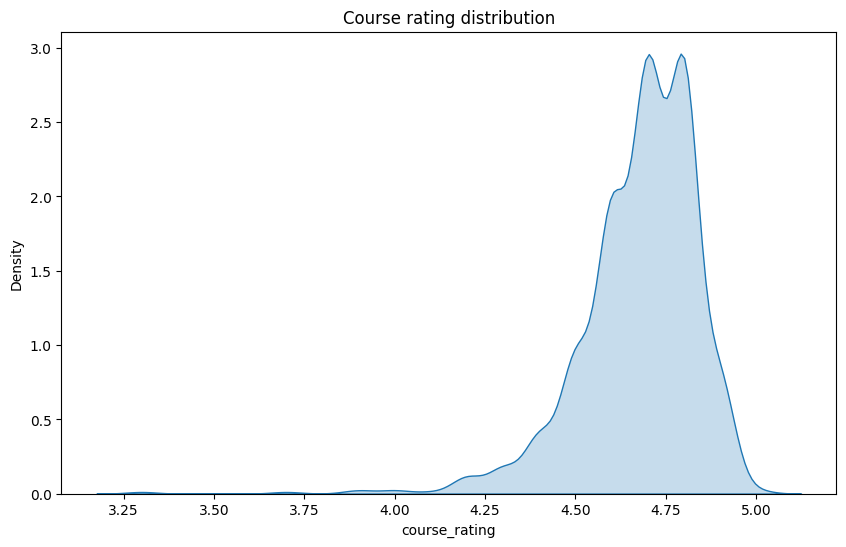

In [62]:
fig = plt.figure(figsize=(10, 6))
sns.kdeplot(df_coursera["course_rating"], fill=True)
plt.title("Course rating distribution")

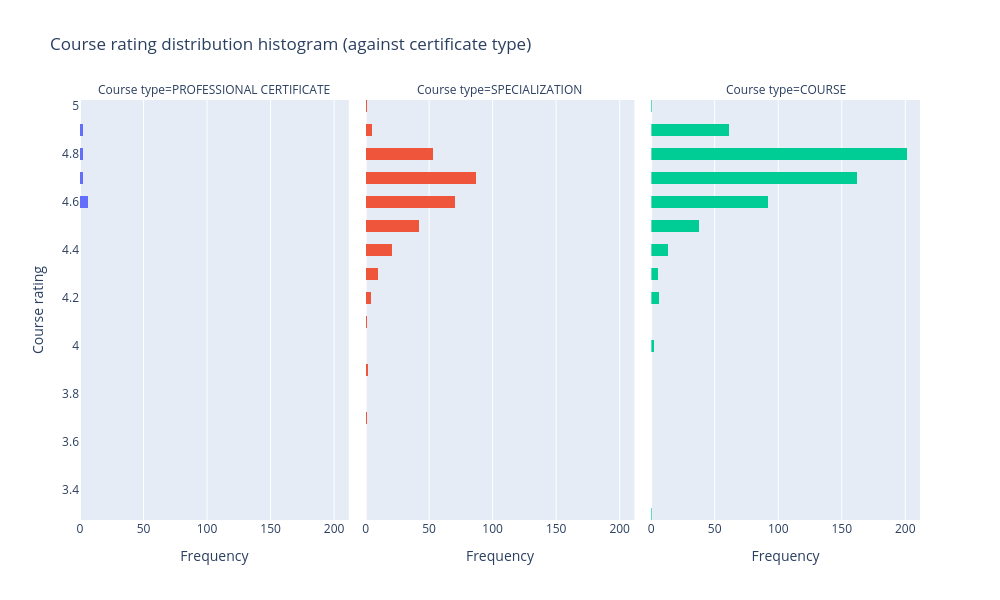

In [63]:
fig = px.histogram(
    df_coursera,
    y="course_rating",
    title="Course rating distribution histogram (against certificate type)",
    nbins=50,
    color="course_Certificate_type",
    facet_col="course_Certificate_type",
    labels={
        "course_rating": "Course rating",
        "course_Certificate_type": "Course type",
    },
)
fig.update_layout(showlegend=False)
fig.update_xaxes(title_text="Frequency")
display(Image(pio.to_image(fig, format="png", width=1000, height=600)))
# fig.show()

From the histogram above we can see that most data points belong to the **COURSE** certificate type. This gives the idea that these type of courses are preferred as they seem to have more ratings then the other two types. On the other hand the course type with the highest rating values, thus *the most appreciated* course type are those that offer a **PROFESSIONAL CERTIFICATE**. 

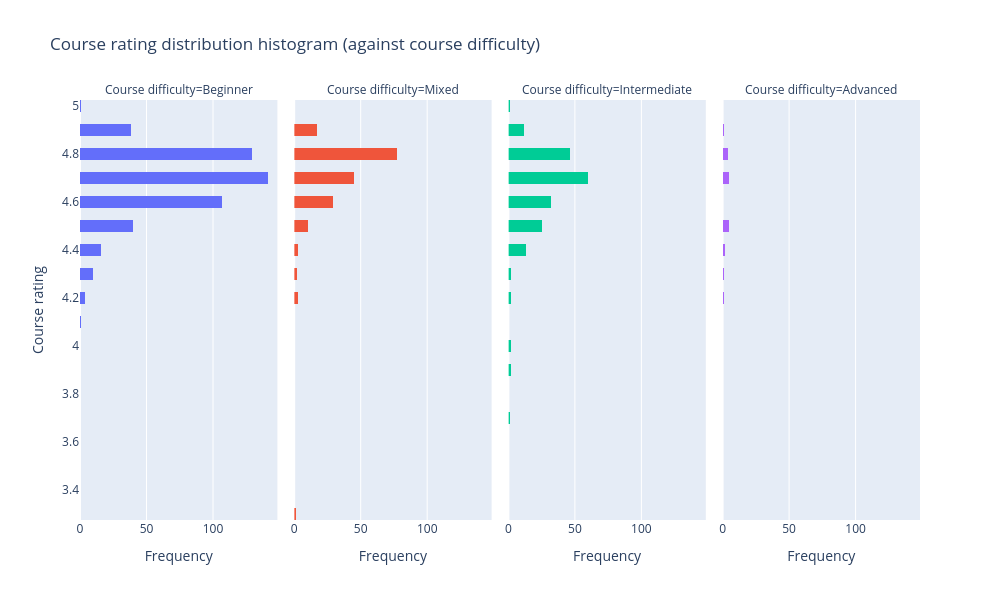

In [64]:
fig = px.histogram(
    df_coursera,
    y="course_rating",
    title="Course rating distribution histogram (against course difficulty)",
    nbins=50,
    marginal="box",
    color="course_difficulty",
    facet_col="course_difficulty",
    labels={"course_rating": "Course rating", "course_difficulty": "Course difficulty"},
)
fig.update_layout(showlegend=False)
fig.update_xaxes(title_text="Frequency")
display(Image(pio.to_image(fig, format="png", width=1000, height=600)))
# fig.show()

From the histogram above we can observe that most people prefer to enroll in Beginner level courses, therefore the majority of the ratings especially high ratings are given to said courses.

Let's continue analyzing `course_students_enrolled` second:

In [65]:
df_coursera.course_students_enrolled.describe().to_frame().round().astype("int").T

,count,mean,std,min,25%,50%,75%,max
course_students_enrolled,891,90552,181936,1500,17500,42000,99500,3200000


Text(0.5, 1.0, 'Distribution of students enrolled in courses')

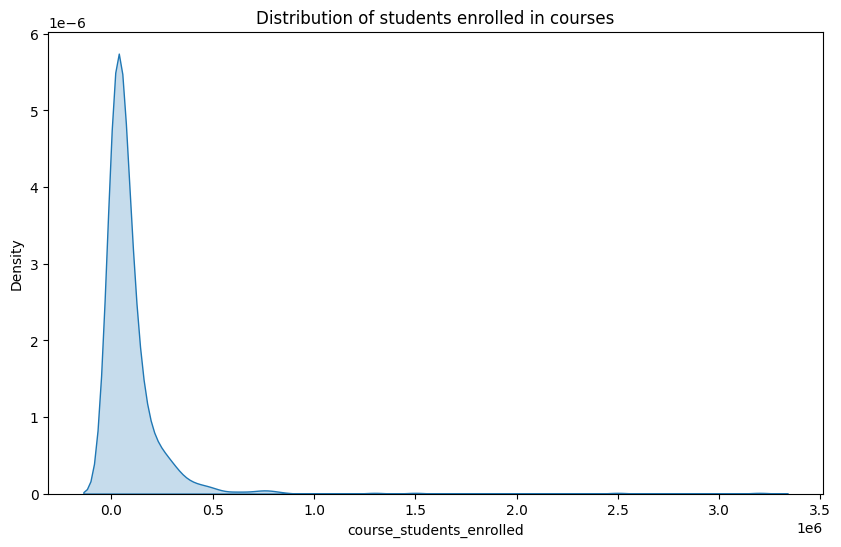

In [66]:
fig = plt.figure(figsize=(10, 6))
sns.kdeplot(df_coursera["course_students_enrolled"], fill=True)
plt.title("Distribution of students enrolled in courses")

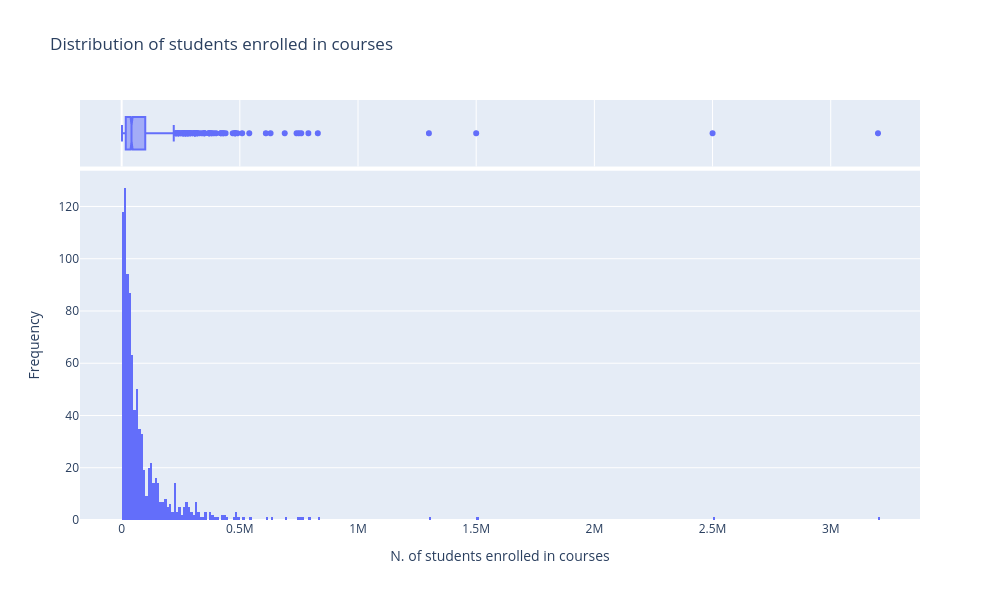

In [67]:
fig = px.histogram(
    df_coursera,
    x="course_students_enrolled",
    title="Distribution of students enrolled in courses",
    marginal="box",
    nbins=500,
    labels={"course_students_enrolled": "N. of students enrolled in courses"},
)
fig.update_layout(yaxis_title_text="Frequency")
display(Image(pio.to_image(fig, format="png", width=1000, height=600)))
# fig.show()

The standard deviation value of this columns values is quite high which means that the values would are quite distributed. Yet the majority of the data seems to stay in the fence between $1500$ peope and $220000$. The histrogram and the kde plot back this up since we can see that the data is skewed on the left therefore there is a lack of uniformity in this distribution.

### Relationship analysis & Correlations

In this part of the data analysis, I will use scatter plots and correlation matrices to get a better view of how the data within the colums are correlated.

The relationships that I will be analyzing are those between `course_rating` and `course_students_enrolled` columns. First I will plot the data in a scatterplot to see if there is any recognisable pattern or trend. Then I will separate them by coloring which will involve the following categorical data:
- difficulty, 
- certificate type.

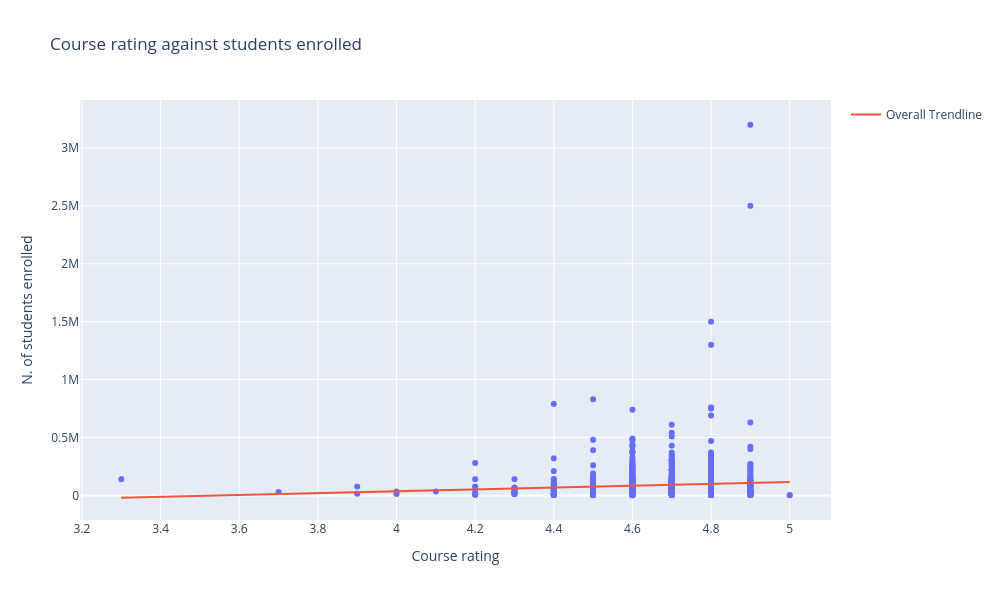

In [68]:
fig = px.scatter(
    df_coursera,
    x="course_rating",
    y="course_students_enrolled",
    title="Course rating against students enrolled",
    labels={
        "course_rating": "Course rating",
        "course_students_enrolled": "N. of students enrolled",
    },
    trendline="ols",
    trendline_scope="overall",
)
display(Image(pio.to_image(fig, format="png", width=1000, height=600)))
# fig.show()

From the overall trendline visible on the scatterplot above, we can assume that there is some sort of *very weak* positive relationship between the two columns, where the higher the course rating the more students tend to enroll into it. 

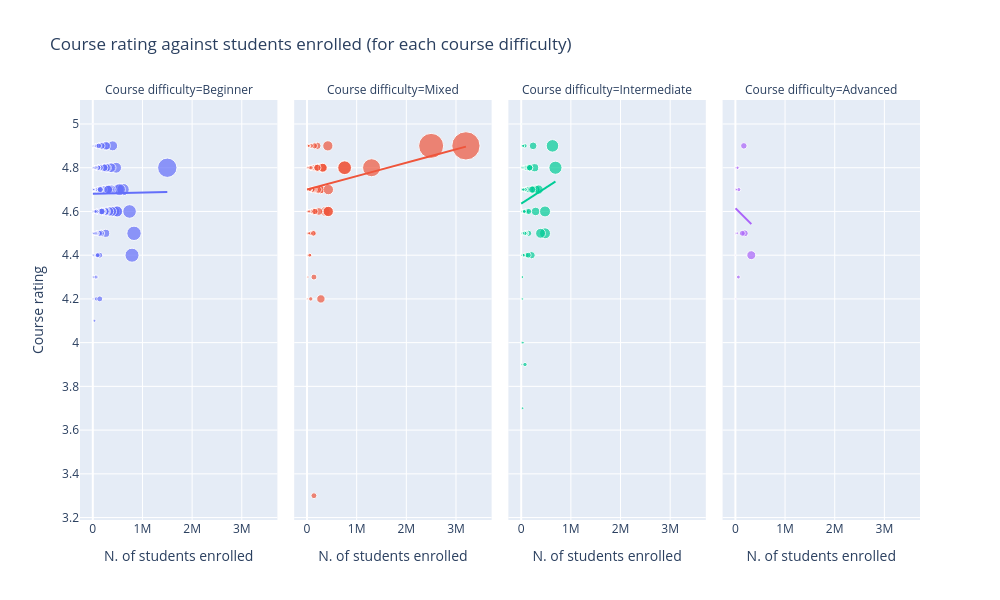

In [69]:
fig = px.scatter(
    df_coursera,
    x="course_students_enrolled",
    y="course_rating",
    facet_col="course_difficulty",
    color="course_difficulty",
    title="Course rating against students enrolled (for each course difficulty)",
    labels={
        "course_students_enrolled": "N. of students enrolled",
        "course_rating": "Course rating",
        "course_difficulty": "Course difficulty",
    },
    size="course_students_enrolled",
    trendline="ols",
)
fig.update_layout(showlegend=False)
display(Image(pio.to_image(fig, format="png", width=1000, height=600)))
# fig.show()

From the trendlines shown on the scatterplot above, we can infer that there is in fact the relationship between the number of students enrolled and the rating of the course is different depending on the course difficulty. The relationship changes as follows:
- For *Beginner* difficulty courses the slope of the trendline is very slightly positive.
- The same follows for *Mixed* difficulty courses, although the slope is higher.
- *Intermediate* courses follow the same pattern, but this relationship seems to be more positive than the last.
- For *Advanced* courses we can see that the relationship becomes negative, indicating that the more students enrolled in an advanced course the lower the rating tends to be. However, it is worth noting that the lowest rating for such courses is 4.3

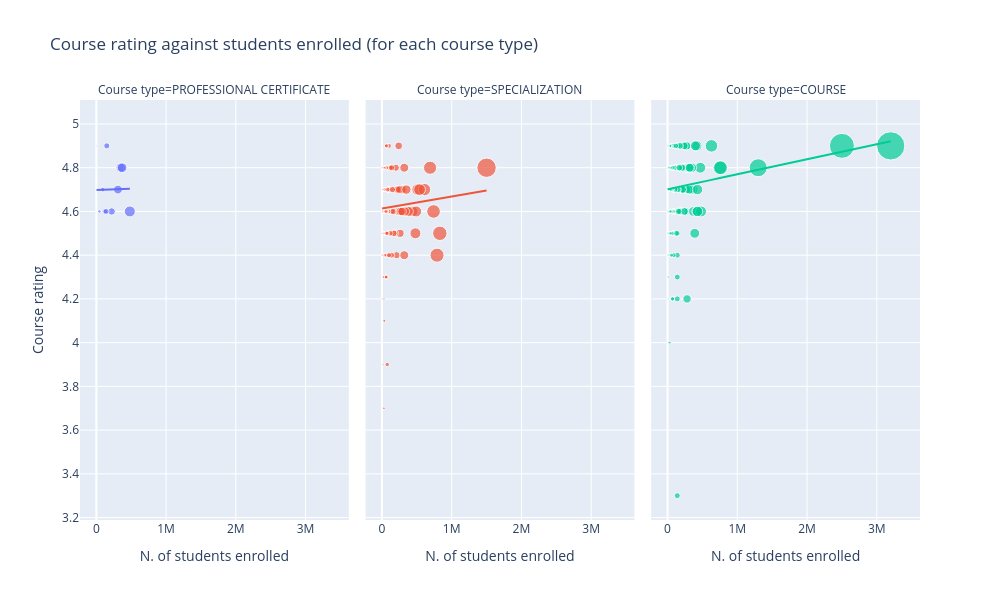

In [70]:
fig = px.scatter(
    df_coursera,
    x="course_students_enrolled",
    y="course_rating",
    facet_col="course_Certificate_type",
    color="course_Certificate_type",
    title="Course rating against students enrolled (for each course type)",
    labels={
        "course_students_enrolled": "N. of students enrolled",
        "course_rating": "Course rating",
        "course_Certificate_type": "Course type",
    },
    size="course_students_enrolled",
    trendline="ols",
)
fig.update_layout(showlegend=False)
display(Image(pio.to_image(fig, format="png", width=1000, height=600)))
# fig.show()

The trendlines in the scatterplot indicate that the relationship between the course rating and number of students enrolled is independent of course type. That is because the trendlines all show a positive correlation between the points and there is not much difference between each course type.

**_Correlations_**: Now I will use the Pearson correlation method to create the correlation matrix and find out how closely related the numeric values are to each other. The **thresholds** of the Pearson correlation matrix are as follows (in absolute value):

- 0.8 to 1: very strong
- 0.6 to 0.8: strong
- 0.4 to 0.6: moderate
- 0.2 to 0.4: weak
- 0 to 0.2: very weak/no correlation

In [71]:
corr_matrix = df_coursera.corr(numeric_only=True)
fn.find_correlations(corr_matrix, [-0.2, 0.2]).style.background_gradient(
    cmap="coolwarm"
)

,feature1,feature2,correlation
1,course_rating,course_students_enrolled,0.071090


As previously suspected, there is a **very weak positive correlation** between the two numerical columns of this dataFrame, namely `course_rating` and `course_students_enrolled`

### Comparative analysis of categorical data

On this part of the analysis I will focus on providing a comparative analysis of two categorical data: `course_organization` and `course_title`. The aim is to compare different organizations/courses with each other to be able to determine the best and the top 5 of each category based on rating and participation for each level of difficulty and certificate type.

I wil start by pulling up to the screen the overall descriptive table performed above:

In [72]:
description

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
count,891,891,891,891.000000,891,8.910000e+02
unique,888,154,3,NaN,4,NaN
top,Developing Your Musicianship,University of Pennsylvania,COURSE,NaN,Beginner,NaN
freq,2,59,582,NaN,487,NaN
mean,NaN,NaN,NaN,4.677329,NaN,9.055208e+04
std,NaN,NaN,NaN,0.162225,NaN,1.819365e+05
min,NaN,NaN,NaN,3.300000,NaN,1.500000e+03
25%,NaN,NaN,NaN,4.600000,NaN,1.750000e+04
50%,NaN,NaN,NaN,4.700000,NaN,4.200000e+04
75%,NaN,NaN,NaN,4.800000,NaN,9.950000e+04


Below is the analysis of the course organization in terms of course rating:

In [73]:
organization_rating = (
    df_coursera.groupby(
        ["course_organization", "course_difficulty", "course_Certificate_type"]
    )["course_rating"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)
organization_rating

,course_organization,course_difficulty,course_Certificate_type,course_rating
0,Imperial College London,Intermediate,SPECIALIZATION,5.00
1,Universidade Estadual de Campinas,Intermediate,COURSE,4.90
2,Arizona State University,Beginner,PROFESSIONAL CERTIFICATE,4.90
3,Duke University,Advanced,COURSE,4.90
4,University of Florida,Beginner,COURSE,4.90
...,...,...,...,...
363,New York Institute of Finance,Intermediate,COURSE,4.00
364,Imperial College London,Intermediate,COURSE,4.00
365,University of Toronto,Intermediate,SPECIALIZATION,3.90
366,The State University of New York,Mixed,COURSE,3.85


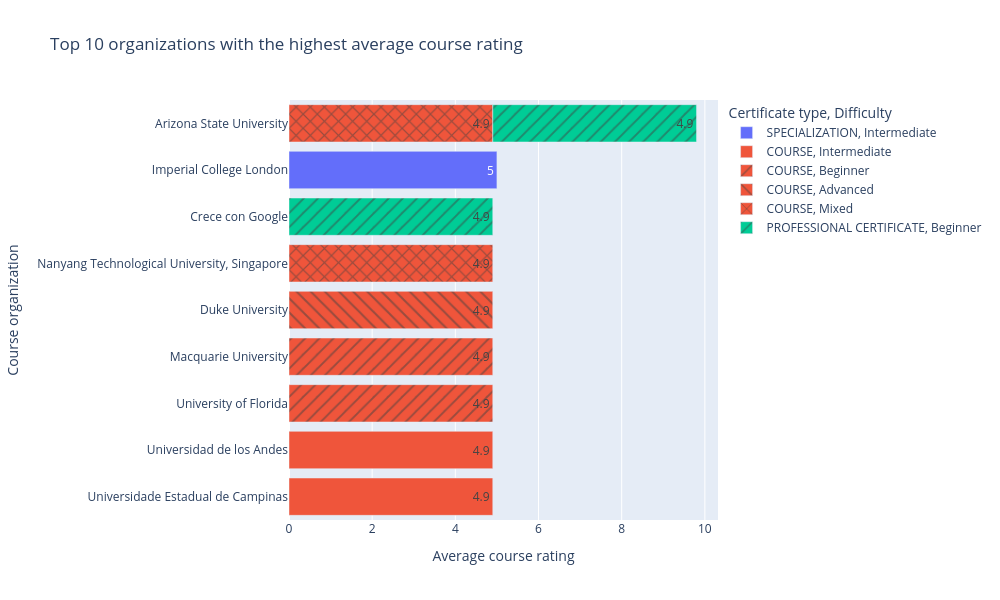

In [74]:
fig = px.bar(
    organization_rating[:10],
    y="course_organization",
    x="course_rating",
    labels={
        "course_rating": "Average course rating",
        "course_organization": "Course organization",
        "course_difficulty": "Difficulty",
        "course_Certificate_type": "Certificate type",
    },
    title="Top 10 organizations with the highest average course rating",
    color="course_Certificate_type",
    pattern_shape="course_difficulty",
    text_auto=True,
)
fig.update_layout(yaxis={"categoryorder": "total ascending"})
display(Image(pio.to_image(fig, format="png", width=1000, height=600)))
# fig.show()

From the table and the bar plot above we  see that the top 5 organizations ranked by course rating. The type of the course and the difficulty are also taken into account. In my opinion, factoring in all the displayed information, the best rated organization is indeed `Imperial College London`.

Below is the analysis of the organizations in terms of students enrolled:

In [75]:
organization_enrolled = (
    df_coursera.groupby(
        ["course_organization", "course_difficulty", "course_Certificate_type"]
    )["course_students_enrolled"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
    .round()
)
organization_enrolled

,course_organization,course_difficulty,course_Certificate_type,course_students_enrolled
0,Stanford University,Mixed,COURSE,3200000.0
1,Georgia Institute of Technology,Beginner,SPECIALIZATION,610000.0
2,Johns Hopkins University,Intermediate,COURSE,480000.0
3,Yale University,Mixed,COURSE,426143.0
4,Ludwig-Maximilians-Universität München (LMU),Intermediate,SPECIALIZATION,350000.0
...,...,...,...,...
363,EDHEC Business School,Intermediate,COURSE,3600.0
364,Peter the Great St. Petersburg Polytechnic Uni...,Beginner,COURSE,2400.0
365,(ISC)²,Beginner,COURSE,2300.0
366,Automation Anywhere,Beginner,SPECIALIZATION,2200.0


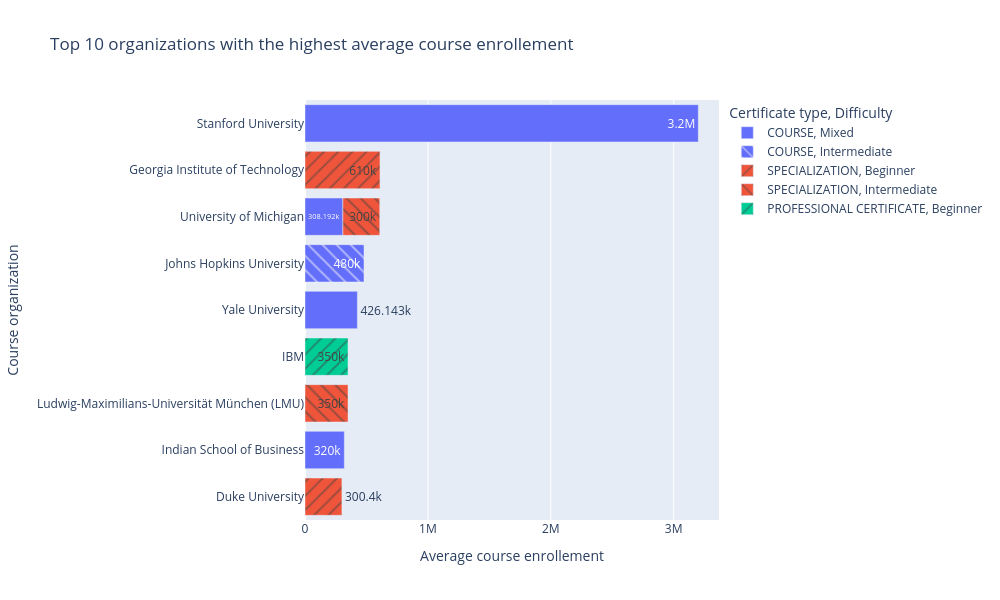

In [76]:
fig = px.bar(
    organization_enrolled[:10],
    y="course_organization",
    x="course_students_enrolled",
    labels={
        "course_students_enrolled": "Average course enrollement",
        "course_organization": "Course organization",
        "course_difficulty": "Difficulty",
        "course_Certificate_type": "Certificate type",
    },
    title="Top 10 organizations with the highest average course enrollement",
    color="course_Certificate_type",
    pattern_shape="course_difficulty",
    text_auto=True,
)
fig.update_layout(yaxis={"categoryorder": "total ascending"})
display(Image(pio.to_image(fig, format="png", width=1000, height=600)))
# fig.show()

The table and the barplot above show the top 5 courses ranked by participation. Evidently, `Standford University` has the highest score. 

Below is the analysis of the course title in terms of rating:

In [77]:
title_rating = (
    df_coursera.groupby(
        ["course_title", "course_difficulty", "course_Certificate_type"]
    )["course_rating"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)
title_rating

,course_title,course_difficulty,course_Certificate_type,course_rating
0,El Abogado del Futuro: Legaltech y la Transfor...,Beginner,COURSE,5.0
1,Infectious Disease Modelling,Intermediate,SPECIALIZATION,5.0
2,Become a CBRS Certified Professional Installer...,Mixed,COURSE,4.9
3,Introduction to Breast Cancer,Mixed,COURSE,4.9
4,Neural Networks and Deep Learning,Intermediate,COURSE,4.9
...,...,...,...,...
886,Mathematics for Machine Learning: PCA,Intermediate,COURSE,4.0
887,iOS App Development with Swift,Intermediate,SPECIALIZATION,3.9
888,Machine Learning for Trading,Intermediate,SPECIALIZATION,3.9
889,Machine Learning and Reinforcement Learning in...,Intermediate,SPECIALIZATION,3.7


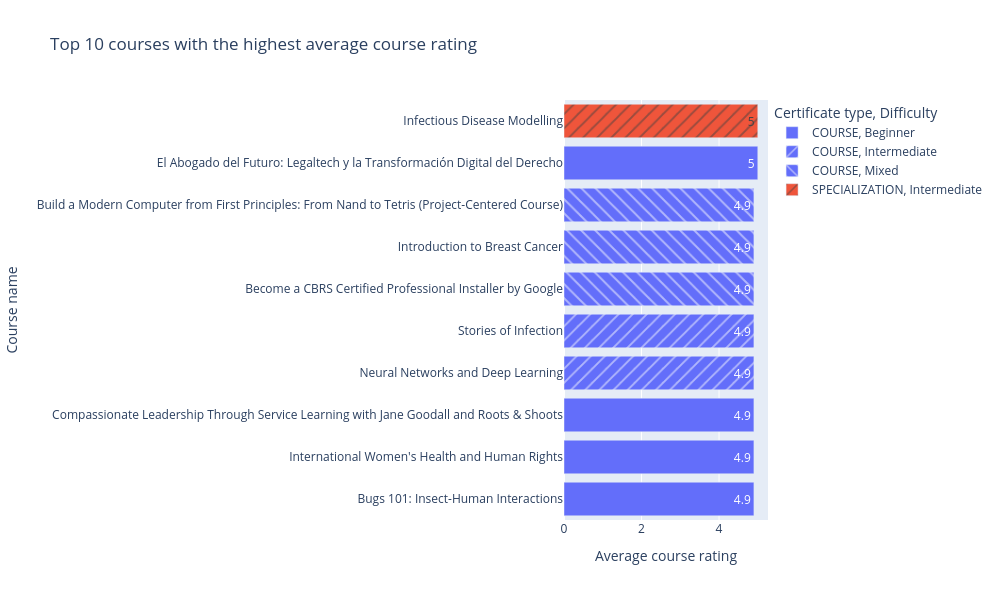

In [78]:
fig = px.bar(
    title_rating[:10],
    y="course_title",
    x="course_rating",
    labels={
        "course_rating": "Average course rating",
        "course_title": "Course name",
        "course_difficulty": "Difficulty",
        "course_Certificate_type": "Certificate type",
    },
    title="Top 10 courses with the highest average course rating",
    color="course_Certificate_type",
    pattern_shape="course_difficulty",
    text_auto=True,
)
fig.update_layout(yaxis={"categoryorder": "total ascending"})
display(Image(pio.to_image(fig, format="png", width=1000, height=600)))
# fig.show()

In terms of rating, through the help of this barplot, we can determine the top 5 courses taught. Considering the difficulty level (intermediate) and the course type(Specialization) the number one rated course would in my opinion be `Infectious Disease Modelling`.

Below is the analysis of course title in terms of students enrolled:

In [79]:
title_enrolled = (
    df_coursera.groupby(
        ["course_title", "course_difficulty", "course_Certificate_type"]
    )["course_students_enrolled"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)
title_enrolled

,course_title,course_difficulty,course_Certificate_type,course_students_enrolled
0,Machine Learning,Mixed,COURSE,3200000.0
1,The Science of Well-Being,Mixed,COURSE,2500000.0
2,Python for Everybody,Beginner,SPECIALIZATION,1500000.0
3,Programming for Everybody (Getting Started wit...,Mixed,COURSE,1300000.0
4,Data Science,Beginner,SPECIALIZATION,830000.0
...,...,...,...,...
886,"Identifying, Monitoring, and Analyzing Risk an...",Beginner,COURSE,1700.0
887,Healthcare Law,Intermediate,SPECIALIZATION,1700.0
888,Blockchain Revolution in Financial Services,Beginner,SPECIALIZATION,1600.0
889,Infectious Disease Modelling,Intermediate,SPECIALIZATION,1600.0


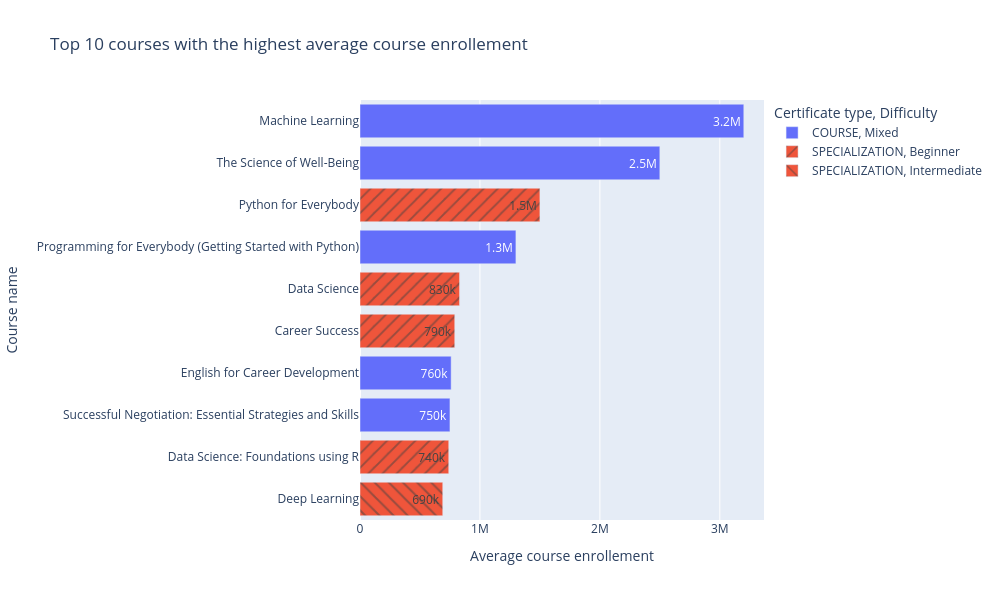

In [80]:
fig = px.bar(
    title_enrolled[:10],
    y="course_title",
    x="course_students_enrolled",
    labels={
        "course_students_enrolled": "Average course enrollement",
        "course_title": "Course name",
        "course_difficulty": "Difficulty",
        "course_Certificate_type": "Certificate type",
    },
    title="Top 10 courses with the highest average course enrollement",
    color="course_Certificate_type",
    pattern_shape="course_difficulty",
    text_auto=True,
)
fig.update_layout(yaxis={"categoryorder": "total ascending"})

display(Image(pio.to_image(fig, format="png", width=1000, height=600)))
# fig.show()

In terms of participation, the top 5 courses are listed in the table and barplot above. The course with the highest number of participants was `Machine Learning`.

### Questions for further analysis:

##### Which organization is the best? Which course is the best?

To answer these questions we need to take into consideration the findings above and put both numerical values into perspective instead of separating them selectively. To do this I will select all the information for the 4 "winners" from the original dataFrame.

In [81]:
best_orgs = ["Stanford University", "Imperial College London"]
best_courses = ["Machine Learning", "Infectious Disease Modelling"]

df_coursera[
    df_coursera["course_organization"].isin(best_orgs)
    & df_coursera["course_title"].isin(best_courses)
]

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
6,Machine Learning,Stanford University,COURSE,4.9,Mixed,3200000
401,Infectious Disease Modelling,Imperial College London,SPECIALIZATION,5.0,Intermediate,1600


From the result of the selection, we observe that the top two courses are taght by the top two organizations. Therefore, considering all the infromation available, the top place is held by the *mixed-difficulty* course `Machine Learning` taught by `Standford University` with 3.2M enrolled students and a rating of 4.9.

##### How many courses are offered by each organization? How many organizations offer a course with the same name?

In [82]:
courses_offered = (
    df_coursera.groupby(["course_organization"])
    .course_title.count()
    .sort_values(ascending=False)
)
courses_offered.rename(
    index=lambda x: (
        "Organizations with < 21 courses" if courses_offered.loc[x] <= 21 else x
    ),
    inplace=True,
)

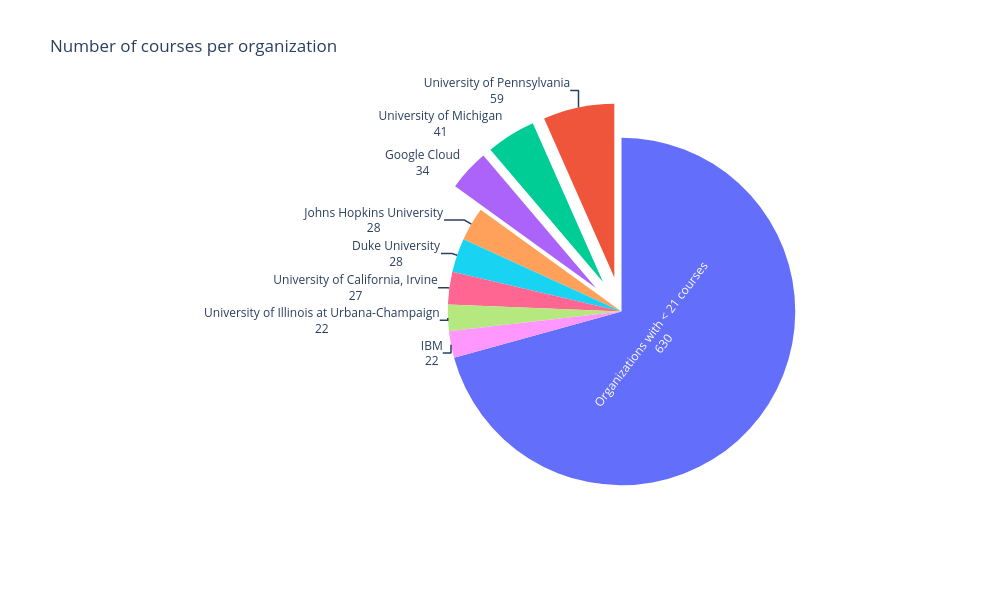

In [83]:
fig = px.pie(
    courses_offered,
    title="Number of courses per organization",
    names=courses_offered.index,
    values=courses_offered.values,
)
fig.update_traces(
    textinfo="label+value",
    hoverinfo="label+percent+value",
    pull=[0.2, 0.2, 0.2, 0, 0, 0, 0, 0, 0],
    showlegend=False,
)
display(Image(pio.to_image(fig, format="png", width=1000, height=600)))
# fig.show()

Based on the results above. The organization with the highest number of courses offered is the `University of Pennsylvania`, offering 59 courses in total. More than 70% of the Organizations present in the list offer less than 21 courses.

Now let's check for courses of the same name offered by different organizations.

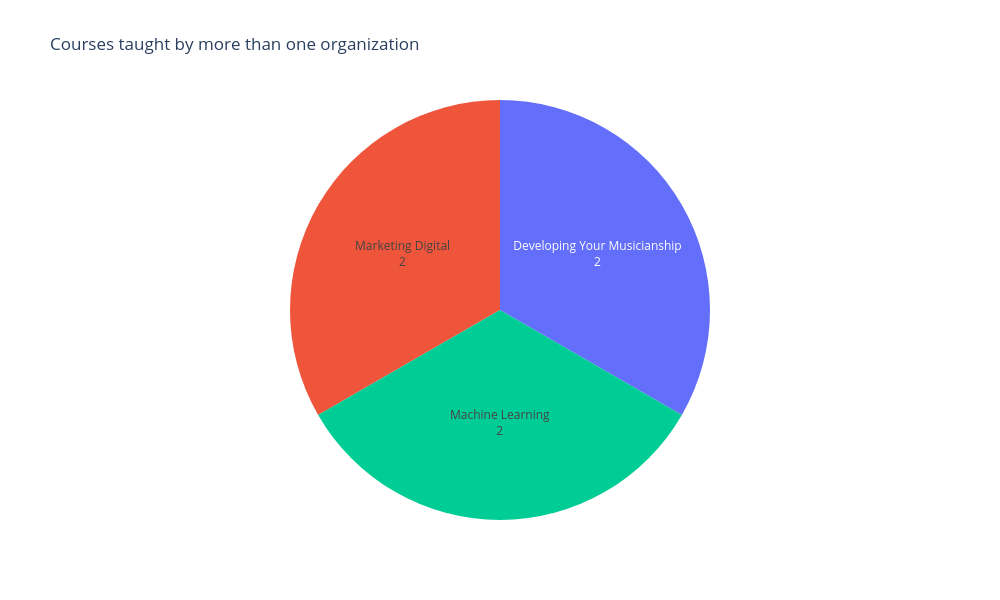

In [84]:
same_course = (
    df_coursera.groupby("course_title")
    .course_organization.count()
    .sort_values(ascending=False)
)
same_course = same_course[same_course.values > 1]

fig = px.pie(
    same_course,
    title="Courses taught by more than one organization",
    names=same_course.index,
    values=same_course.values,
)
fig.update_traces(
    textinfo="label+value", hoverinfo="label+percent+value", showlegend=False
)
display(Image(pio.to_image(fig, format="png", width=1000, height=600)))
# fig.show()

There are only 3 courses taught by more than one organization and they are shown on the piechart above.

# Summary

In this analysis, we explored a Coursera dataset to understand various aspects of the courses offered by different organizations. Here are the key findings:

1. **Data Preprocessing**:
    - The dataset was cleaned by checking for missing values, duplicates, and correcting data types.
    - Outliers were identified in the `course_rating` and `course_students_enrolled` columns.

2. **Descriptive Statistics**:
    - The dataset contains 891 courses from 154 organizations.
    - The average course rating is 4.68, with a standard deviation of 0.16.
    - The number of students enrolled in courses varies significantly, with a mean of approximately 90,552 students.

3. **Data Visualization**:
    - KDE plots and histograms were used to visualize the distribution of `course_rating` and `course_students_enrolled`.
    - Scatter plots revealed a very weak positive correlation between course ratings and the number of students enrolled.

4. **Comparative Analysis**:
    - **Top Organizations**:
      - `Imperial College London` has the highest average course rating.
      - `Stanford University` has the highest average course enrollment.
    - **Top Courses**:
      - `Infectious Disease Modelling` is the highest-rated course.
      - `Machine Learning` has the highest number of students enrolled.

5. **Correlation Analysis**:
    - The Pearson correlation matrix confirmed a very weak positive correlation between `course_rating` and `course_students_enrolled`.

6. **Further Analysis**:
    - The organization offering the most courses is the `University of Pennsylvania` with 59 courses.
    - Only three courses are offered by more than one organization.

These findings provide a general overview of the Coursera dataset, highlighting key trends and insights into course ratings, enrollments, and organizational performance.

# Ideas for further analysis

1. The number of reviews was not provided in the dataset. This makes course rating less comparable and less credible. If in a course with 1600 students enrolled only 20 students leave a review and note down a rating, the value of the actual rating would not reflect the real rating.
2. User demographic data (such as their age, location, etc.) would be useful for further analysis. This way we could analyze what kind of courses are preferred by which demographic group, and so on.
3. Timestamp data would also be useful for the analysis. This way we could create trendlines to see how the data in the table changes over time and analyze trends using lineplots.
